In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import sreq
import networkx
import emails

In [3]:
def ifstr(elem):
    if type(elem)==str:
        return elem
    if type(elem)==tuple:
        return elem[0]
def takeSec(elem):
    return elem[1]

In [4]:
all_txtfile = "allintxns.txt"
top_txtfile = "topintxns.txt"
f = open(all_txtfile, "r+")
#strx = f.read()

In [5]:
f = open("inxnmoyrs.txt", "r+")
strx=f.read()

In [6]:
def str2list(listx): # take str and return list of (((sender,receiver),date),freq)
    import re
    relist = []
    listx1 = re.split('\n',listx)
    for thing in listx1:
        num = re.findall("//(.*)",thing)
        first = re.findall("^(.*)[+]",thing)
        sec = re.findall("[+](.*)!!",thing)
        moyr = re.findall("[!!]+(.+)//",thing)
        if num==[] or first==[] or sec ==[]:
            pass
        else:
            g=(((first[0],sec[0]),moyr[0]),int(num[0]))
            relist.append(g)
    alls=[]
    intwt=[]
    brr30=[]
    for tup in relist:
        sr = tup[0]
        alls.extend(sr)
    #allsd = list(dict.fromkeys(alls))
    for tup in relist:
        sry=tup[0]
        sr=sry[0]
        if sr[0]!=sr[1] and tup[1]>30:
            brr30.append(tup)
        if sr[0]!=sr[1]:
            intwt.append(tup)
    return relist
def tograph(b201x): # takes list and makes a graph
    X = nx.DiGraph()
    for things in b201x:
        srmy = things[0]
        sr=srmy[0]
        s = sr[0]
        r = sr[1]
        freq = things[1]
        X.add_edge(s,r,weight=freq)
    #pos = nx.circular_layout(X)
    #nx.draw_networkx_nodes(X, pos, node_size=10,node_color='c')
    #nx.draw_networkx_edges(X, pos,width=1,edge_color='c')
    return X

In [7]:
def getBC(relist,xym): # generates list of BC for each node in graph for a given month
    for r in relist:
        srym = r[0]
        ym=srym[1]
        if ym == xym:
            p=[]
            bc = networkx.algorithms.centrality.betweenness_centrality(m)
            bc1 = sre.tolist(bc)
    return bc1

In [8]:
cal=[]
for y in range(2011,2017):
    for m in range(1,13):
        if len(str(m))==1:
            m0 = str('0'+str(m))
        else:
            m0 = str(m)
        ym = str(str(y)+"-"+str(m0))
        cal.append(ym)
cal.sort() # list of calendar months e.g. 2011-02

In [9]:
sryf = str2list(strx)

In [11]:
relist = str2list(strx)

In [13]:
grap = tograph(sryf)
bc = networkx.algorithms.centrality.betweenness_centrality(grap)
dc = networkx.algorithms.centrality.degree_centrality(grap)
ldc = sreq.tolist(dc)
lbc = sreq.tolist(bc)
ldc.sort(key=takeSec)
lbc.sort(key=takeSec)
bcn=[]
bc2 = emails.revlist(lbc)
for items in bc2[0:15]:
    bcn.append(items[0])
dcn=[]
dc2 = emails.revlist(ldc)
for items in dc2[0:15]:
    dcn.append(items[0])

In [16]:
def XCout(relist,names,bdc):
    def bcdc(grap):
        if bdc == 'bc':
            xc = networkx.algorithms.centrality.betweenness_centrality(grap)
        elif bdc == 'dc':
            xc = networkx.algorithms.centrality.degree_centrality(grap)
        return xc
    # generates list of lists, where each list/folder contains first item is str(date), and subsequent items
    # are the list items for that month
    folders=[]
    for date in cal:
        month=[]
        month.append(date)
        for item in relist:
            sry = item[0]
            if sry[1] == date:
                month.append(item)
        folders.append(month) 
    # turns into graph and gets bc/dc
    ult=[]
    for folder in folders:
        newlist=[]
        date=folder[0]
        newlist.append(date)
        gbs=[]
        for thing in folder:
            if type(thing)==tuple:
                gbs.append(thing)
        grap = tograph(gbs)
        xc = bcdc(grap,)
        xc1=sreq.tolist(xc)
        for tup in xc1:
            newlist.append(tup)
        ult.append(newlist)  
    # for each folder, outputs only for names in list "names"
    bct=[]
    for u in ult:
        noms=[]
        new=[]
        date = u[0]
        new.append(date)
        for m in u:
            bc = m[1]
            nom = m[0]
            noms.append(nom)
            if type(m)==tuple:
                for n in names:
                    if n == nom:
                        k = (nom,bc)
                        new.append(k)
                        new.sort(key=ifstr)
        bct.append(new)
    a=[]
    b=[]
    c=[]
    lenname = len(names)
    for q in bct:
        date = q[0]
        if len(q) > 1:
            items = q[1:]
            new=[]
            newitems=[]
            new.append(date)
            if len(items)==lenname:
                for i in items:
                    new.append(i)
                    new.sort(key=ifstr)
                    a.append((new))
            elif len(items)<=lenname and len(items)!=0:
                noms=[]
                newitems.append(date)
                newitems.extend(items)
                for i in items:
                    noms.append(i[0])
                b.append(noms)
                for n in names:
                    if n not in noms:
                        k = (n,0)
                        newitems.append(k)
                        newitems.sort(key=ifstr)
                        if len(newitems)==4:
                            a.append(newitems)
                        else:
                            a.append(newitems)
        elif len(q) == 1:
            newitems=[]
            newitems.append(q[0])
            for n in names:
                new = (n, 0)
                newitems.append(new)
                newitems.sort(key=ifstr)
                a.append(newitems)
    a.sort()
    return a


In [17]:
# if bc, use bcn; if dc, use dcn (top 15 for each measure)
x = XCout(relist,dcn,'dc')

In [19]:
x[0]

['2011-01',
 ('Benzie, Richard', 0.36363636363636365),
 ('Busch, Stephen', 0),
 ('Cook, Pat', 0),
 ('Devereaux, Tracy', 0),
 ('Dykema, Linda', 0),
 ('Krisztian, George', 0),
 ('Pallone, Maggie', 0),
 ('Prysby, Mike', 0),
 ('Rosenthal, Adam', 0),
 ('Shaler, Karen', 0),
 ('Shekter Smith, Liane', 0.09090909090909091),
 ('Sygo, Jim', 0),
 ('Tommasulo, Karen', 0),
 ('Wurfel, Brad', 0),
 ('Wyant, Dan', 0)]

In [22]:
g=[]
for xs in x:
    g.append(tuple(xs))
gg = list(dict.fromkeys(g)) # makes into tuple so i can eliminate duplicates
gg.sort()

In [ ]:
import csv
with open('DC.csv', mode='w') as usd_file:
        table = csv.writer(usd_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for elem in gg:
            date = elem[0]
            a=elem[1]
            b=elem[2]
            c=elem[3]
            d=elem[4]
            e=elem[5]
            f=elem[6]
            g=elem[7]
            h=elem[8]
            i=elem[9]
            j=elem[10]
            k=elem[11]
            l=elem[12]
            m=elem[13]
            n=elem[14]
            o=elem[15]
            table.writerow([date,a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1]])
            
            
            

In [23]:
# END #

In [ ]:
# a graph

In [26]:
intwt = str2list(strx)

In [30]:
intwt[0]

((('Jonas, Jill', 'Smith, Gerald'), '2011-01'), 4)

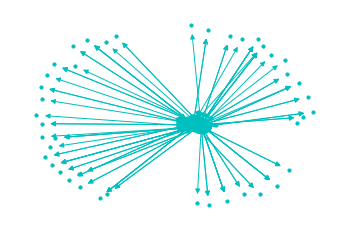

In [34]:
X = nx.MultiDiGraph()
for sams in intwt:
    sry = sams[0]
    sr = sry[0]
    for name in sr:
        if name in ["Wurfel, Brad","Shekter Smith, Liane","Prysby, Mike"]:
            s = sr[0]
            r = sr[1]
            freq = sams[1]
            X.add_edge(s,r,weight=freq)

pos = nx.spring_layout(X)  # positions for all nodes
    
#for i in range(0,777):
    #e = [(u, v) for (u, v, d) in X.edges(data=True) if d['weight'] == i]
    #nx.draw_networkx_edges(X, pos, edgelist=e,width=math.sqrt(i/10),edge_color='c',alpha=i)
    
e1 = [(u, v) for (u, v, d) in X.edges(data=True) if d['weight'] > 120]
e2 = [(u, v) for (u, v, d) in X.edges(data=True) if d['weight'] in range(90,120)]
e3 = [(u, v) for (u, v, d) in X.edges(data=True) if d['weight'] in range(20,90)]
e3 = [(u, v) for (u, v, d) in X.edges(data=True) if d['weight'] in range(20,90)]
e4 = [(u, v) for (u, v, d) in X.edges(data=True) if d['weight'] in range(0,5)]



# nodes
nx.draw_networkx_nodes(X, pos, node_size=10,node_color='c')

# edges
nx.draw_networkx_edges(X, pos, edgelist=e1,width=7,edge_color='c', alpha=0.9)
nx.draw_networkx_edges(X, pos, edgelist=e2,width=5,edge_color='c', alpha=0.9)
nx.draw_networkx_edges(X, pos, edgelist=e3,width=3,edge_color='c',alpha=0.95)
nx.draw_networkx_edges(X, pos, edgelist=e4,width=1,edge_color='c',alpha= 1.0)

# labels
nx.draw_networkx_labels(X, pos, font_size=10,alpha=0)

plt.axis('off')
plt.savefig('grap.jpg')
plt.show();
